In [3]:
%env GDAL_ENABLE_DEPRECATED_DRIVER_GTM=YES

env: GDAL_ENABLE_DEPRECATED_DRIVER_GTM=YES


In [25]:
from copy import deepcopy
import json
from io import StringIO

import requests
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

## Set up

In [5]:
CARGILL_COLORS = {
    'PMS 704 C'         : '#A72B2D',
    'PMS 167 C'         : '#C2531B',
    'PMS 145 C'         : '#D57F00',
    'PMS 110 C'         : '#DBAA00',
    'PMS 7745 C'        : '#ABAD25',
    'PMS 370 C'         : '#638C1C',
    'PMS 7473 C'        : '#19988B',
    'PMS 7474 C'        : '#007582',
    'PMS 7469 C'        : '#005E86',
    'Cool Gray 2 C'     : '#D1D0CF',
    'Cool Gray 7 C'     : '#98999B',
    'Cool Gray 10 C'    : '#63656A',
}

In [6]:
CARGILL_COLORS_25PC_TINT = {
    'PMS 704 C'         : '#BD6062',
    'PMS 167 C'         : '#D17E54',
    'PMS 145 C'         : '#E09F40',
    'PMS 110 C'         : '#E4BF40',
    'PMS 7745 C'        : '#C0C25C',
    'PMS 370 C'         : '#8AA955',
    'PMS 7473 C'        : '#53B2A8',
    'PMS 7474 C'        : '#4098A1',
    'PMS 7469 C'        : '#4086A4',
}

In [7]:
CARGILL_COLORS_75PC_TINT = {
    'PMS 704 C'         : '#E9CACB',
    'PMS 167 C'         : '#F0D4C6',
    'PMS 145 C'         : '#F5DFBF',
    'PMS 110 C'         : '#F6EABF',
    'PMS 7745 C'        : '#EAEBC9',
    'PMS 370 C'         : '#D8E2C6',
    'PMS 7473 C'        : '#C6E5E2',
    'PMS 7474 C'        : '#BFDDE0',
    'PMS 7469 C'        : '#BFD7E1',
}

In [8]:
CARGILL_COLORS_50PC_TINT = {
    'PMS 704 C'         : '#D39596',
    'PMS 167 C'         : '#E1A98D',
    'PMS 145 C'         : '#EABF80',
    'PMS 110 C'         : '#EDD580',
    'PMS 7745 C'        : '#D5D692',
    'PMS 370 C'         : '#B1C68E',
    'PMS 7473 C'        : '#8CCCC5',
    'PMS 7474 C'        : '#80BAC1',
    'PMS 7469 C'        : '#80AFC3',
}

## Brazil

In [19]:
STATES_API_URL = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados'
GEOMETRY_API_BASE_URL = (
    'https://servicodados.ibge.gov.br/api/v3/malhas/estados/{id}?' + 
    '&'.join([
        'qualidade=minima',
        'formato=application/json',
    ])
)
GEOMETRY_API_BASE_URL

'https://servicodados.ibge.gov.br/api/v3/malhas/estados/{id}?qualidade=minima&formato=application/json'

In [20]:
brazil_states_request = requests.get(STATES_API_URL)
brazil_states_request.status_code

200

In [21]:
brazil_states = brazil_states_request.json()
brazil_states

[{'id': 11,
  'sigla': 'RO',
  'nome': 'Rondônia',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 12,
  'sigla': 'AC',
  'nome': 'Acre',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 13,
  'sigla': 'AM',
  'nome': 'Amazonas',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 14,
  'sigla': 'RR',
  'nome': 'Roraima',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 15,
  'sigla': 'PA',
  'nome': 'Pará',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 16,
  'sigla': 'AP',
  'nome': 'Amapá',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 17,
  'sigla': 'TO',
  'nome': 'Tocantins',
  'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}},
 {'id': 21,
  'sigla': 'MA',
  'nome': 'Maranhão',
  'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}},
 {'id': 22,
  'sigla': 'PI',
  'nome': 'Piauí',
  'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}},
 {'id': 23,
  'sigla': 'CE',
  'nome': 'Ceará',
  'r

### All regions

In [22]:
brazil_states_df = pd.json_normalize(brazil_states)
brazil_states_df

,id,sigla,nome,regiao.id,regiao.sigla,regiao.nome
0,11,RO,Rondônia,1,N,Norte
1,12,AC,Acre,1,N,Norte
2,13,AM,Amazonas,1,N,Norte
3,14,RR,Roraima,1,N,Norte
4,15,PA,Pará,1,N,Norte
5,16,AP,Amapá,1,N,Norte
6,17,TO,Tocantins,1,N,Norte
7,21,MA,Maranhão,2,NE,Nordeste
8,22,PI,Piauí,2,NE,Nordeste
9,23,CE,Ceará,2,NE,Nordeste


In [28]:
def gpd_read_url_json(url: str) -> gpd.GeoDataFrame:
    with requests.get(url) as response:
        # A buffer is required as `gpd.read_file` cannot read Python objects directly
        # so we load the response JSON and dump it back into the buffer.
        with StringIO(json.dumps(response.json())) as buffer:
            return gpd.read_file(buffer)

In [29]:
brazil_states_geometries = {
    row.id: gpd_read_url_json(GEOMETRY_API_BASE_URL.format(id=row.id)).geometry
    for _, row in brazil_states_df.iterrows()
}
brazil_states_geometries

{11: 0    POLYGON ((-62.41704 -13.11979, -62.61187 -13.0...
 Name: geometry, dtype: geometry,
 12: 0    POLYGON ((-66.81099 -9.81687, -66.62690 -9.898...
 Name: geometry, dtype: geometry,
 13: 0    POLYGON ((-58.14871 -7.34309, -58.13760 -7.355...
 Name: geometry, dtype: geometry,
 14: 0    POLYGON ((-64.18403 3.48865, -64.19652 3.57883...
 Name: geometry, dtype: geometry,
 15: 0    POLYGON ((-48.19418 -4.91082, -48.21224 -4.924...
 Name: geometry, dtype: geometry,
 16: 0    MULTIPOLYGON (((-50.44985 2.11011, -50.36036 2...
 Name: geometry, dtype: geometry,
 17: 0    POLYGON ((-47.42969 -6.42271, -47.42458 -6.496...
 Name: geometry, dtype: geometry,
 21: 0    MULTIPOLYGON (((-48.02543 -4.77803, -47.81647 ...
 Name: geometry, dtype: geometry,
 22: 0    POLYGON ((-40.76395 -8.24346, -40.78047 -8.297...
 Name: geometry, dtype: geometry,
 23: 0    POLYGON ((-40.37210 -2.81270, -40.18491 -2.811...
 Name: geometry, dtype: geometry,
 24: 0    POLYGON ((-36.50462 -6.38615, -36.52826 -6.479...


In [30]:
bounds_df_list = []
for index, geometry in brazil_states_geometries.items():
    bounds_series = geometry.bounds
    bounds_series['id'] = index
    bounds_df_list.append(bounds_series)
bounds_df = pd.concat(bounds_df_list)
bounds_df

,minx,miny,maxx,maxy,id
0,-66.8103,-13.6930,-59.7794,-7.9759,11
0,-73.9833,-11.1456,-66.6269,-7.1118,12
0,-73.8016,-9.8180,-56.0987,2.2440,13
0,-64.8105,-1.5790,-58.8955,5.2718,14
0,-58.8955,-9.8412,-46.0634,2.5837,15
0,-54.8723,-1.2150,-49.8817,4.5088,16
0,-50.7389,-13.4682,-45.6993,-5.1684,17
0,-48.7552,-10.2585,-41.7967,-1.0528,21
0,-46.0124,-10.9190,-40.3705,-2.7573,22
0,-41.4144,-7.8576,-37.2527,-2.8034,23


In [31]:
bounds_df['region_id'] = (bounds_df.id - bounds_df.id % 10) // 10
bounds_df

,minx,miny,maxx,maxy,id,region_id
0,-66.8103,-13.6930,-59.7794,-7.9759,11,1
0,-73.9833,-11.1456,-66.6269,-7.1118,12,1
0,-73.8016,-9.8180,-56.0987,2.2440,13,1
0,-64.8105,-1.5790,-58.8955,5.2718,14,1
0,-58.8955,-9.8412,-46.0634,2.5837,15,1
0,-54.8723,-1.2150,-49.8817,4.5088,16,1
0,-50.7389,-13.4682,-45.6993,-5.1684,17,1
0,-48.7552,-10.2585,-41.7967,-1.0528,21,2
0,-46.0124,-10.9190,-40.3705,-2.7573,22,2
0,-41.4144,-7.8576,-37.2527,-2.8034,23,2


In [32]:
region_bounds_series = bounds_df.groupby('region_id').agg({
    'minx': 'min',
    'miny': 'min',
    'maxx': 'max',
    'maxy': 'max',
})
region_bounds_series

,minx,miny,maxx,maxy
region_id,,,,
1,-73.9833,-13.6930,-45.6993,5.2718
2,-48.7552,-18.3372,-34.8027,-1.0528
3,-53.1052,-25.3089,-39.6678,-14.2532
4,-57.5941,-33.7439,-48.0961,-22.5269
5,-61.6283,-24.0682,-45.9072,-7.3561


In [33]:
brazil_bounds_series = region_bounds_series.apply({
    'minx': 'min',
    'miny': 'min',
    'maxx': 'max',
    'maxy': 'max',
})
brazil_bounds_series

minx   -73.9833
miny   -33.7439
maxx   -34.8027
maxy     5.2718
dtype: float64

In [34]:
REGIONS_COLOR_MAP = {
    1: 'PMS 370 C',
    2: 'PMS 7745 C',
    3: 'PMS 145 C',
    4: 'PMS 167 C',
    5: 'PMS 110 C',
}
STATES_COLOR_MAP = {row.id: REGIONS_COLOR_MAP[row['regiao.id'] ]
    for _, row in brazil_states_df.iterrows()}
STATES_HEX_COLOR_MAP = {key: CARGILL_COLORS[value] for key, value in STATES_COLOR_MAP.items()}
STATES_HEX_COLOR_MAP

{11: '#638C1C',
 12: '#638C1C',
 13: '#638C1C',
 14: '#638C1C',
 15: '#638C1C',
 16: '#638C1C',
 17: '#638C1C',
 21: '#ABAD25',
 22: '#ABAD25',
 23: '#ABAD25',
 24: '#ABAD25',
 25: '#ABAD25',
 26: '#ABAD25',
 27: '#ABAD25',
 28: '#ABAD25',
 29: '#ABAD25',
 31: '#D57F00',
 32: '#D57F00',
 33: '#D57F00',
 35: '#D57F00',
 41: '#C2531B',
 42: '#C2531B',
 43: '#C2531B',
 50: '#DBAA00',
 51: '#DBAA00',
 52: '#DBAA00',
 53: '#DBAA00'}

In [35]:
def color_brazil_regions(
        regions_df: pd.DataFrame,
        color_map: dict[int, str],
        region_geometries: dict[int, gpd.GeoSeries] = None,
        ax: plt.Axes = None,
        **fig_kwargs) -> plt.Axes:

    if 'cmap' in fig_kwargs.keys():
        raise ValueError('Custom color map must be specified using the color_map positional argument')

    for _, row in regions_df.iterrows():
        geometry_url = GEOMETRY_API_BASE_URL.format(id=row.id)
        geometry_geoseries: gpd.GeoSeries
        if region_geometries is not None and row.id in region_geometries:
            geometry_geoseries = region_geometries[row.id]
        else:
            geometry_geoseries = gpd.read_file(geometry_url)

        ax = geometry_geoseries.plot(
            color=color_map[row.id],
            ax=ax,
            **fig_kwargs)

    return ax

<AxesSubplot:>

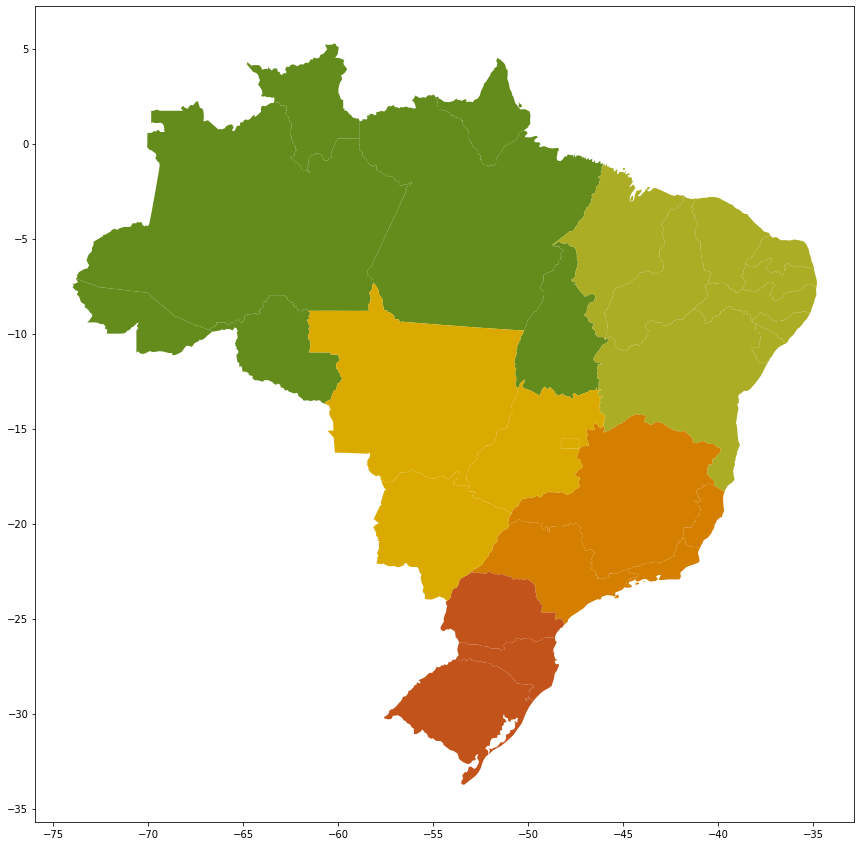

In [37]:
color_brazil_regions(
    brazil_states_df,
    STATES_HEX_COLOR_MAP,
    region_geometries=brazil_states_geometries,
    figsize=(15, 15))

## South America
The map of other countries in South America will be used as background so the video frame is not so empty.

In [38]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [39]:
world: gpd.GeoDataFrame = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [40]:
world.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [43]:
south_america: gpd.GeoDataFrame = world[
    (world.continent == 'South America')
    | (world.name == 'France') # French Guiana is a part of France 
]
south_america

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
30,11513100.0,South America,Bolivia,BOL,40895,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,32510453.0,South America,Peru,PER,226848,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,28515829.0,South America,Venezuela,VEN,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
41,782766.0,South America,Guyana,GUY,5173,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."


In [44]:
south_america_no_brazil = south_america[south_america.name != 'Brazil']
south_america_no_brazil

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
20,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
28,3461734.0,South America,Uruguay,URY,56045,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1..."
30,11513100.0,South America,Bolivia,BOL,40895,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0..."
31,32510453.0,South America,Peru,PER,226848,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
40,28515829.0,South America,Venezuela,VEN,482359,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
41,782766.0,South America,Guyana,GUY,5173,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371..."
42,581363.0,South America,Suriname,SUR,3697,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375..."


<AxesSubplot:>

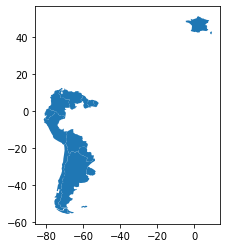

In [45]:

background_geometry: gpd.GeoSeries = south_america_no_brazil.geometry
background_geometry.plot()

## Putting it all together

<AxesSubplot:>

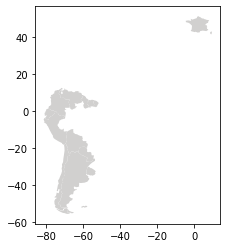

In [46]:
ax = background_geometry.plot(color=CARGILL_COLORS['Cool Gray 2 C'])
ax

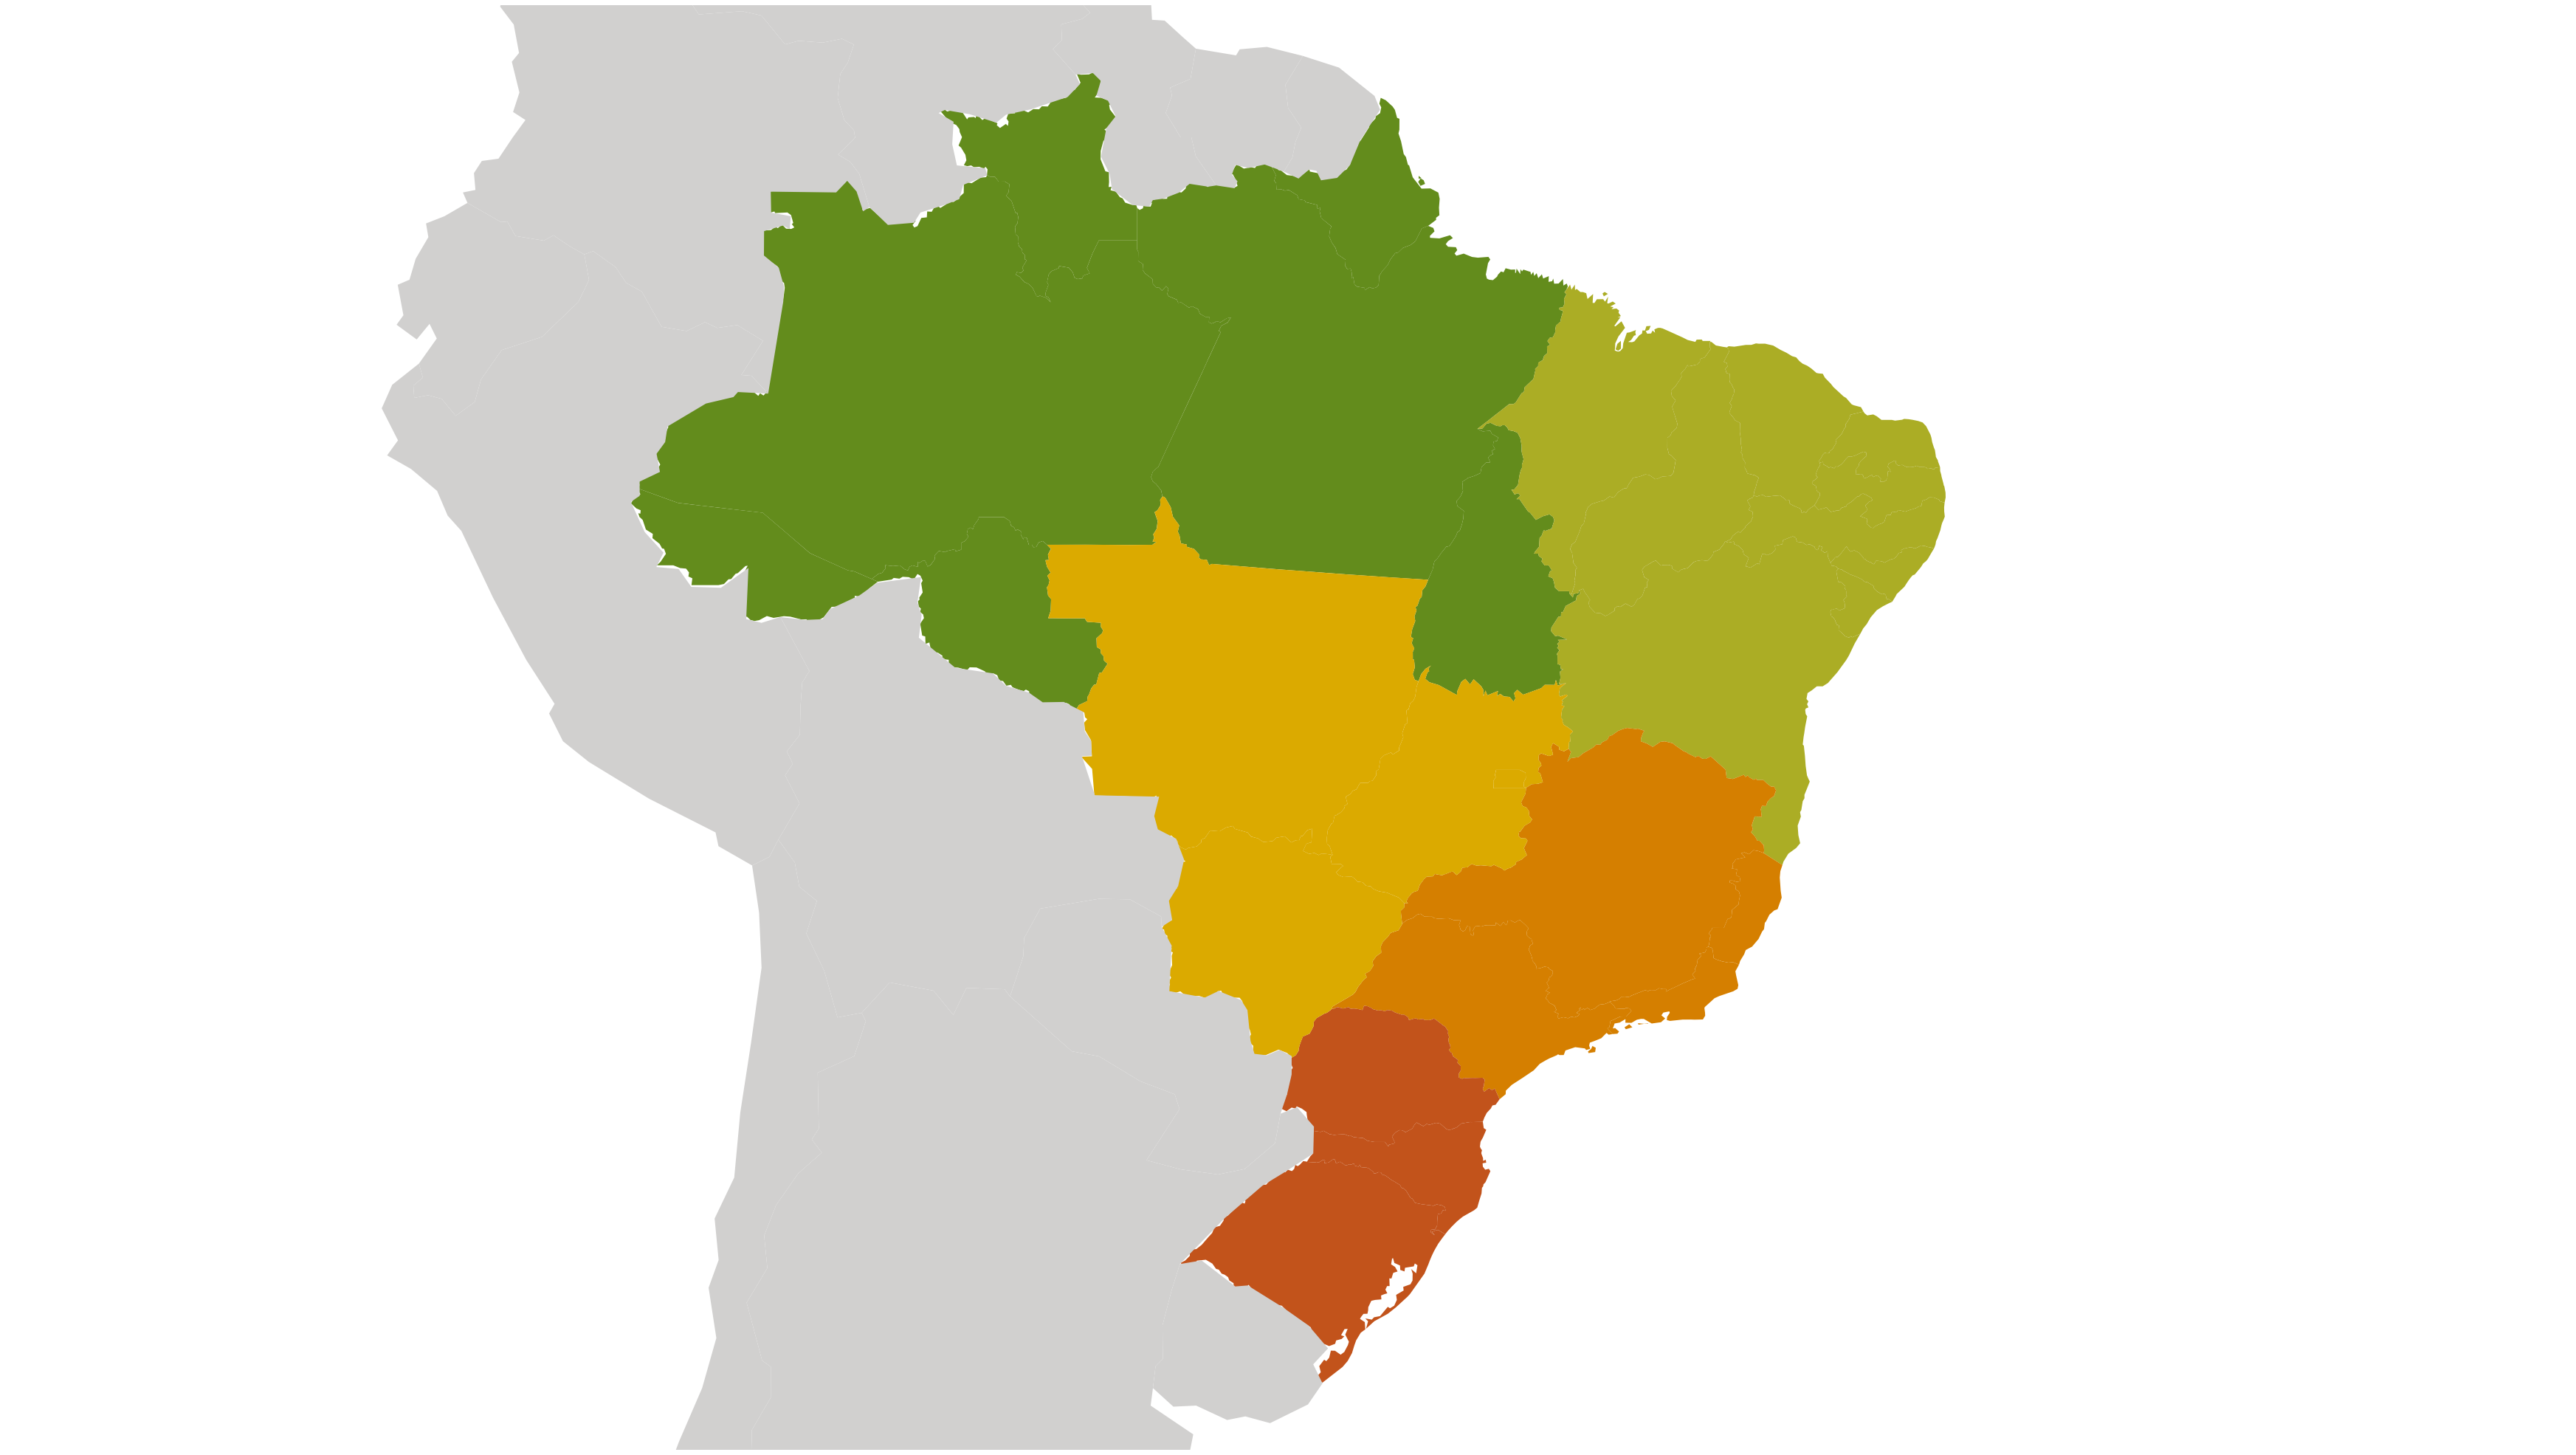

In [47]:
COORDINATE_BUFFER_AROUND_BRAZIL = 2
SCALE = 4
ASPECT_RATIO = 16/9

xlim = (
    brazil_bounds_series.minx - COORDINATE_BUFFER_AROUND_BRAZIL,
    brazil_bounds_series.maxx + COORDINATE_BUFFER_AROUND_BRAZIL,
)
ylim = (
    brazil_bounds_series.miny - COORDINATE_BUFFER_AROUND_BRAZIL,
    brazil_bounds_series.maxy + COORDINATE_BUFFER_AROUND_BRAZIL,
)
height = abs(ylim[0] - ylim[1])
width = height * ASPECT_RATIO
center_x = (brazil_bounds_series.minx + brazil_bounds_series.maxx) / 2
xlim = (
    center_x - width/2,
    center_x + width/2,
)

ax = color_brazil_regions(
    brazil_states_df,
    STATES_HEX_COLOR_MAP,
    region_geometries=brazil_states_geometries,
    figsize=(16*SCALE, 9*SCALE))
background_geometry.plot(color=CARGILL_COLORS['Cool Gray 2 C'], ax=ax)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_axis_off()

In [48]:
def plot(
        regions_df: pd.DataFrame,
        region_geometries: dict[int, gpd.GeoSeries],
        bounds: pd.Series,
        background_geometry: gpd.GeoSeries,
        buffer_around_brazil: int = 2,
        color_map: dict[int, str] = STATES_HEX_COLOR_MAP,
        background_color: str = CARGILL_COLORS['Cool Gray 2 C'],
        aspect: tuple[int, int] = (16, 9),
        scale: int = 1,
        **plot_kwargs) -> plt.Axes:

    xlim = (
        bounds.minx - buffer_around_brazil,
        bounds.maxx + buffer_around_brazil,
    )
    ylim = (
        bounds.miny - buffer_around_brazil,
        bounds.maxy + buffer_around_brazil,
    )
    height = abs(ylim[0] - ylim[1])
    aspect_ratio = aspect[0] / aspect[1]
    width = height * aspect_ratio
    center_x = (bounds.minx + bounds.maxx) / 2
    xlim = (
        center_x - width/2,
        center_x + width/2,
    )

    ax = color_brazil_regions(
        regions_df,
        color_map,
        region_geometries=region_geometries,
        figsize=(scale*aspect[0], scale*aspect[1]),
        **plot_kwargs)
    background_geometry.plot(color=background_color, ax=ax)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_axis_off()

    return ax

<AxesSubplot:>

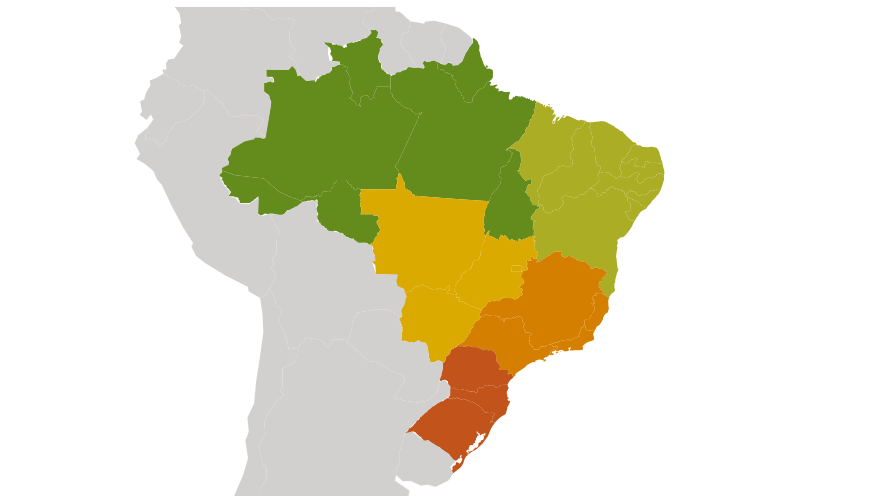

In [50]:
plot(
    brazil_states_df,
    brazil_states_geometries,
    brazil_bounds_series,
    background_geometry)

In [51]:
def get_highlight_color_maps(
        standard_color_map: dict[int, str],
        highligh_colors: dict[int, str],
        region_non_highlight_colors: dict[int, str],
        state_non_highlight_colors: dict[int, str]):
    color_maps = {
        0: {key: state_non_highlight_colors[value] for key, value in standard_color_map.items()}
    }
    for highlight_state_id in standard_color_map.keys():
        highlight_region_id = highlight_state_id // 10
        color_map = {}
        for state_id, color_name in standard_color_map.items():
            region_id = state_id // 10
            if state_id != highlight_state_id:
                if region_id != highlight_region_id:
                    color_map[state_id] = state_non_highlight_colors[color_name]
                else:
                    color_map[state_id] = region_non_highlight_colors[color_name]
            else:
                color_map[state_id] = highligh_colors[color_name]
        
        color_maps[highlight_state_id] = color_map
    
    return color_maps

In [52]:
highlight_color_maps = get_highlight_color_maps(
    STATES_COLOR_MAP,
    CARGILL_COLORS,
    CARGILL_COLORS_50PC_TINT,
    CARGILL_COLORS_75PC_TINT)

len(highlight_color_maps)

28

In [53]:
highlight_color_maps

{0: {11: '#D8E2C6',
  12: '#D8E2C6',
  13: '#D8E2C6',
  14: '#D8E2C6',
  15: '#D8E2C6',
  16: '#D8E2C6',
  17: '#D8E2C6',
  21: '#EAEBC9',
  22: '#EAEBC9',
  23: '#EAEBC9',
  24: '#EAEBC9',
  25: '#EAEBC9',
  26: '#EAEBC9',
  27: '#EAEBC9',
  28: '#EAEBC9',
  29: '#EAEBC9',
  31: '#F5DFBF',
  32: '#F5DFBF',
  33: '#F5DFBF',
  35: '#F5DFBF',
  41: '#F0D4C6',
  42: '#F0D4C6',
  43: '#F0D4C6',
  50: '#F6EABF',
  51: '#F6EABF',
  52: '#F6EABF',
  53: '#F6EABF'},
 11: {11: '#638C1C',
  12: '#B1C68E',
  13: '#B1C68E',
  14: '#B1C68E',
  15: '#B1C68E',
  16: '#B1C68E',
  17: '#B1C68E',
  21: '#EAEBC9',
  22: '#EAEBC9',
  23: '#EAEBC9',
  24: '#EAEBC9',
  25: '#EAEBC9',
  26: '#EAEBC9',
  27: '#EAEBC9',
  28: '#EAEBC9',
  29: '#EAEBC9',
  31: '#F5DFBF',
  32: '#F5DFBF',
  33: '#F5DFBF',
  35: '#F5DFBF',
  41: '#F0D4C6',
  42: '#F0D4C6',
  43: '#F0D4C6',
  50: '#F6EABF',
  51: '#F6EABF',
  52: '#F6EABF',
  53: '#F6EABF'},
 12: {11: '#B1C68E',
  12: '#638C1C',
  13: '#B1C68E',
  14: '#B1C68E',
 

## Exporting

In [32]:
background_geometry = south_america.geometry

In [58]:
EXPORT_FORMAT = 'svg'

/tmp/ipykernel_1273/2525617066.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


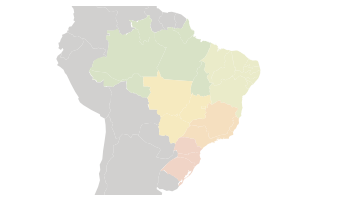

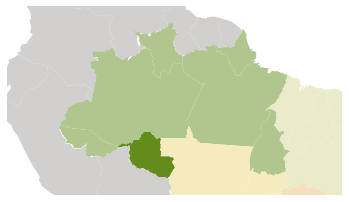

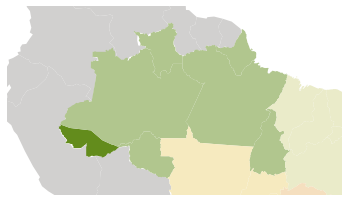

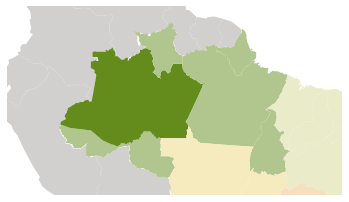

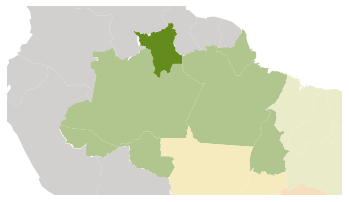

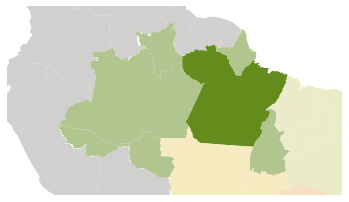

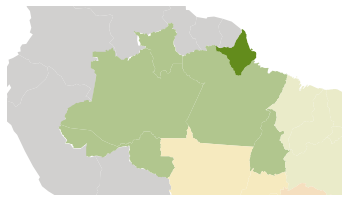

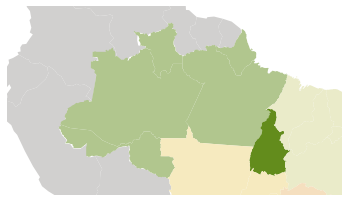

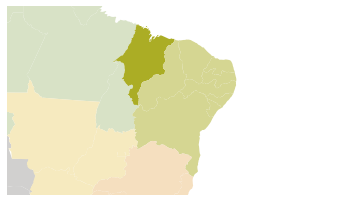

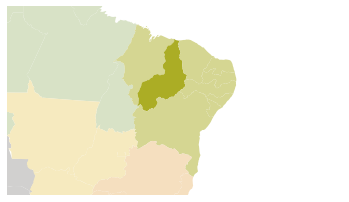

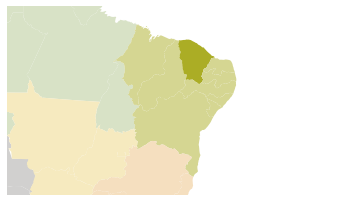

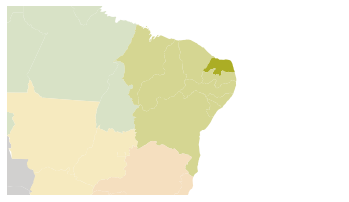

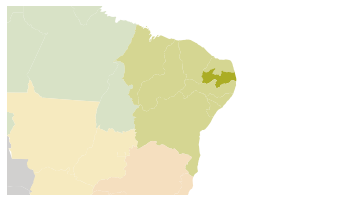

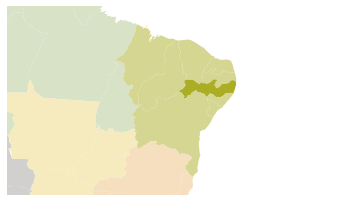

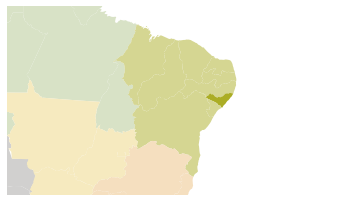

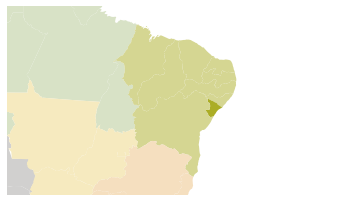

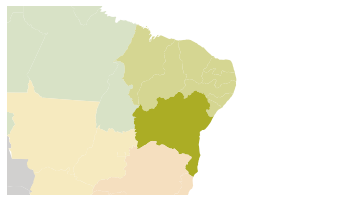

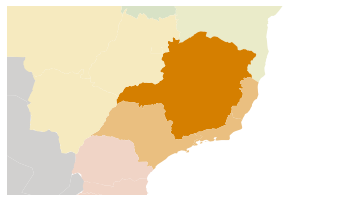

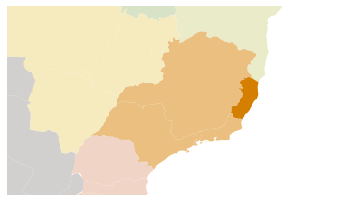

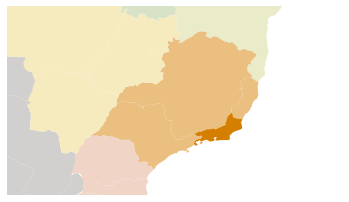

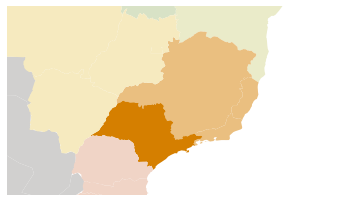

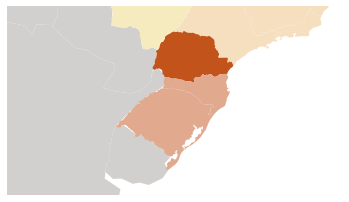

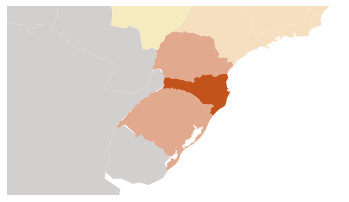

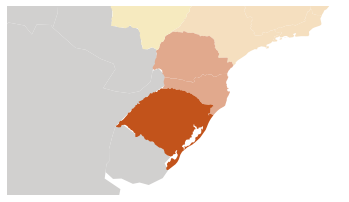

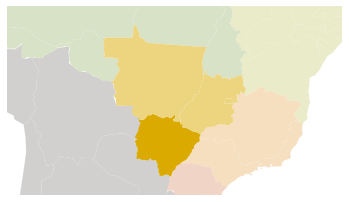

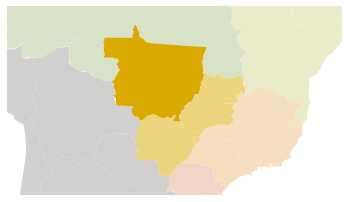

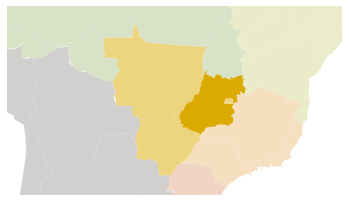

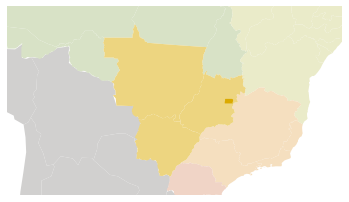

In [59]:
highlight_color_maps = get_highlight_color_maps(
    STATES_COLOR_MAP,
    CARGILL_COLORS,
    CARGILL_COLORS_50PC_TINT,
    CARGILL_COLORS_75PC_TINT)

for i, (state_id, color_map) in enumerate(highlight_color_maps.items()):
    region_id = state_id // 10
    try:
        bounds_series = region_bounds_series.loc[region_id]
    except KeyError:
        bounds_series = brazil_bounds_series
    fig, ax = plt.subplots()
    plot(
        brazil_states_df,
        brazil_states_geometries,
        bounds_series,
        background_geometry,
        color_map=color_map,
        ax=ax,
        zorder=2)
    fig.savefig(
        f'results/{EXPORT_FORMAT}/states/{i}.{EXPORT_FORMAT}',
        bbox_inches='tight',
        pad_inches=0.0)